In [ ]:
import pandas as pd
import numpy as np

mi_tabla = pd.read_csv("peliculas.csv")
dataset = mi_tabla.select_dtypes(np.number)

display(dataset.columns)

Index(['presupuesto', 'popularidad', 'ventas', 'duracion', 'puntuacion',
       'n_votos'],
      dtype='object')


Supongamos que la columna objetivo se llama Co y las variables independientes se llaman C1,C2,...,Cn.

In [ ]:
objetivo = dataset["ventas"]
variables_independientes = dataset[["presupuesto","popularidad",'duracion',"puntuacion", 'n_votos']]

Usaremos sklearn para hallar la regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

# Model fit
modelo.fit(variables_independientes, objetivo)

LinearRegression()

In [ ]:
#alpha value (intercept)
modelo.intercept_

#coef of each explain variables
modelo.coef_

array([ 1.26822288e+00, -7.62386449e+05,  6.63301758e+04,  1.34984611e+06,
        6.92704915e+04])

Ahora usamos el modelo para hacer predicciones sobre nuevas observaciones

In [ ]:
modelo.predict(variables_independientes)

dataset["Co_predict"] = modelo.predict(variables_independientes)

dataset.head(5)

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos,Co_predict
0,3500000.0,14.569650,28215918.0,91.0,7.0,513.0,3.487332e+07
1,12000000.0,9.592265,41205099.0,92.0,6.5,767.0,6.643402e+07
2,31000000.0,6.499680,185260553.0,117.0,6.7,303.0,6.267471e+07
3,52000000.0,18.761467,355237933.0,140.0,7.3,1637.0,1.747015e+08
4,2000000.0,11.528147,1275000.0,83.0,6.8,28.0,8.929894e+05


In [ ]:
#Evaluation
from sklearn import metrics

metrics.mean_squared_error(objetivo, modelo.predict(variables_independientes))
modelo_r2=metrics.r2_score(objetivo, modelo.predict(variables_independientes))
modelo_r2_ajustado = 1 - (1-modelo_r2)*(len(objetivo)-1)/(len(objetivo)-variables_independientes.shape[1]-1)
modelo_r2_ajustado

metrics.

0.5608453805819429

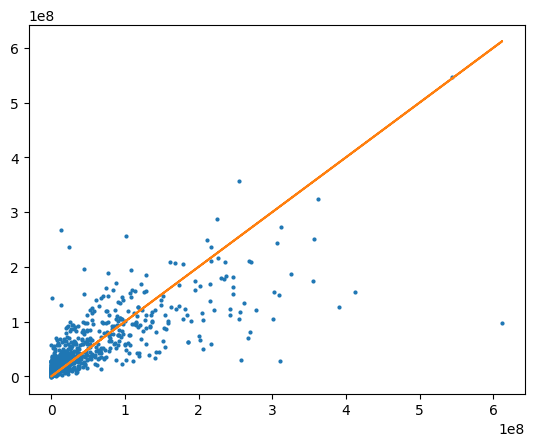

In [ ]:
# PLoting the model
import matplotlib.pyplot as plt
import seaborn as sns

x=dataset['ventas']
y=dataset['Co_predict']

plt.plot(x,y, 'o', markersize=2)
plt.plot(x,x, "-")
plt.show()

#Task 1

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('boston.csv')
dataset = df.select_dtypes(np.number)
dataset.columns[1:13]

goal = dataset['MEDV']
indep_vars = dataset[dataset.columns[1:13]]

35.37973508129446
[ 4.24883214e-02  2.80584246e-02  2.82840874e+00 -1.70182183e+01
  3.84602671e+00  5.47185316e-04 -1.39899389e+00  2.47840386e-01
 -1.21881352e-02 -9.43740929e-01  1.03481181e-02 -5.50210277e-01]
MSE:  22.375502523981417
R2:  0.7349488253339125


(array([  3.,   9., 114., 250.,  82.,  30.,  12.,   3.,   0.,   3.]),
 array([-15.27135046, -11.07561071,  -6.87987097,  -2.68413123,
          1.51160852,   5.70734826,   9.903088  ,  14.09882775,
         18.29456749,  22.49030723,  26.68604698]),
 <BarContainer object of 10 artists>)

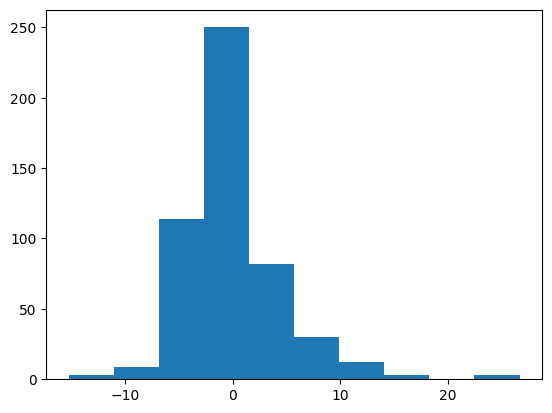

In [ ]:
# We build the linear model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#model fit
model.fit(indep_vars, goal)
print(model.intercept_)
print(model.coef_)

#Evaluation
from sklearn import metrics
print(f'MSE:  {metrics.mean_squared_error(goal, model.predict(indep_vars))}')
print(f'R2:  {metrics.r2_score(goal, model.predict(indep_vars))}')

# Residual observation
import matplotlib.pyplot as plt
residual = goal - model.predict(indep_vars)
display(plt.hist(residual))



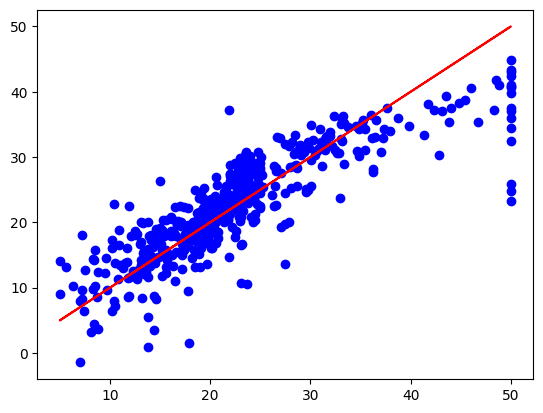

In [ ]:
# PLoting of the qqplot
plt.plot(goal, model.predict(indep_vars), 'o', color='blue')
plt.plot(goal, goal, '-', color='red' )
plt.show()
